In [1]:
from notebook_log_loading import load_sensor_log_file

#sensor_log,first_timestamp=load_sensor_log_file("../to_study/senw_imu.txt")
sensor_log,first_timestamp=load_sensor_log_file("../to_study/initial_motion_calibration_3.txt")

In [2]:
   
    
def toeuler(q):
    w=q[3]
    i=q[0]
    j=q[1]
    k=q[2]
    s=1
    
    cpch=1-2*s*(j*j+k*k)
    cpsh=2*s*(i*j+k*w)
    sp=2*s*(i*k-j*w)
    sbcp=2*s*(j*k+i*w)    
    cbcp=1-2*s*(i*i+j*j)
    
    conv=360/(2*np.pi)
    #heading=360*np.arctan2(cpsh,cpch)/(2*3.14)
    #pitch=-360*np.arcsin(sp)/(2*3.14)
    #bank=360*np.arctan2(sbcp,cbcp)/(2*3.15)
    heading=conv*np.arctan2( 2*(w*i+j*k),1-2*(i*i+j*j))
    pitch=conv*np.arcsin(np.clip(2*(w*j-k*i),-1,1))    
    bank=conv*np.arctan2( 2*(w*k+i*j),1-2*(j*j+k*k))
    return [heading,pitch,bank]

import numpy as np
rot_vecs=[]
rot_vec_ts=[]
eul_vecs=[]
eul_vecs_ts=[]
accel_vecs=[]
accel_vec_ts=[]
gyro_vecs=[]
gyro_vec_ts=[]
gyro_norm=[]
accel_norm=[]
delta_t=[]
for entry in sensor_log:
    if 'packets' in entry:        
        
        
        #if len(entry['packets'])>1:
#            print("multipacket!")
        for packet in entry['packets']:        
            if 'rotation_vector' in packet:
                #rot_vecs.append(correct(packet["rotation_vector"]))
                eul_vecs.append(toeuler(packet["rotation_vector"]))
                #rot_vecs.append([ toheading(packet["rotation_vector"])])
                #rot_vec_ts.append(entry["timestamp"]-first_timestamp- (entry['packets'][-1]["rotation_vector_timestamp"]-packet["rotation_vector_timestamp"]))
                rot_vec_ts.append(packet["rotation_vector_timestamp"])
                rot_vecs.append(packet["rotation_vector"])                
                delta_t.append(packet["rotation_vector_timestamp"]-entry["timestamp"])
            if 'acceleration' in packet:
                #accel_vec_ts.append(entry["timestamp"]-first_timestamp)
                accel_vec_ts.append(packet["acceleration_timestamp"])
                accel_vecs.append(packet["acceleration"])
                accel_norm.append(np.linalg.norm(np.array(packet["acceleration"])))
                delta_t.append(packet["acceleration_timestamp"]-entry["timestamp"])
            if 'gyroscope' in packet:
                #gyro_vec_ts.append(entry["timestamp"]-first_timestamp     -(entry['packets'][-1]["gyroscope_timestamp"]-packet["gyroscope_timestamp"]))
                gyro_vec_ts.append(packet["gyroscope_timestamp"])
                gyro_vecs.append(packet["gyroscope"])
                gyro_norm.append( np.linalg.norm(np.array(packet["gyroscope"])))
                delta_t.append(packet["gyroscope_timestamp"]-entry["timestamp"])
                
                
rot_vecs=np.array(rot_vecs)
accel_vecs=np.array(accel_vecs)
eul_vecs=np.array(eul_vecs)
gyro_vecs=np.array(gyro_vecs)

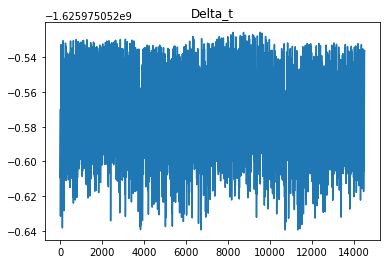

In [3]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
plt.title("Delta_t")
ax.plot( delta_t)
plt.show()

In [4]:
sensor_log[1]

{'timestamp': 1625976237.7483091,
 'image_timestamp': 1185.071783,
 'detections': [{'label': 32,
   'spatial_array': [-174.07662963867188, -106.81975555419922, 1747.0],
   'bbox_array': [0.31673991680145264,
    0.4140668511390686,
    0.541271984577179,
    0.6370258331298828],
   'confidence': 0.9873256683349609},
  {'label': 11,
   'spatial_array': [-277.1891784667969, -4.0763115882873535, 900.0],
   'bbox_array': [0.042614784091711044,
    0.11589586734771729,
    0.47627678513526917,
    0.5422590970993042],
   'confidence': 0.90087890625}],
 'keys': ['detections']}

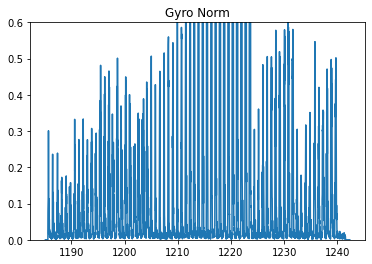

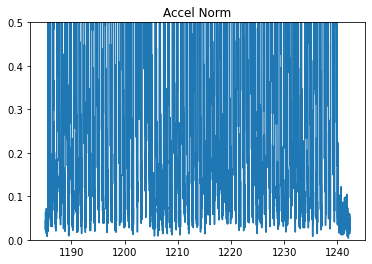

In [5]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
plt.title("Gyro Norm")
plt.ylim([0,0.6])
ax.plot( accel_vec_ts,gyro_norm)
plt.show()

fig, ax = plt.subplots()
plt.title("Accel Norm")
plt.ylim([0,0.5])
ax.plot( accel_vec_ts,accel_norm)
plt.show()

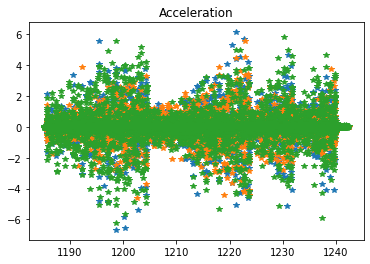

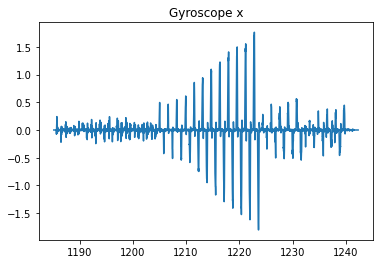

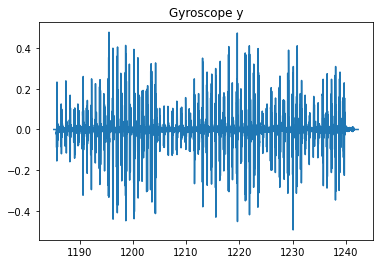

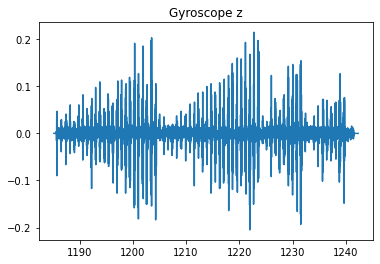

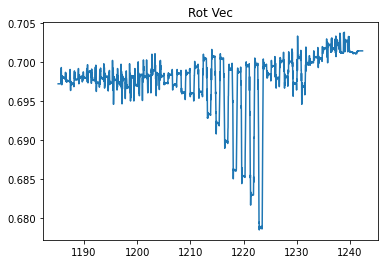

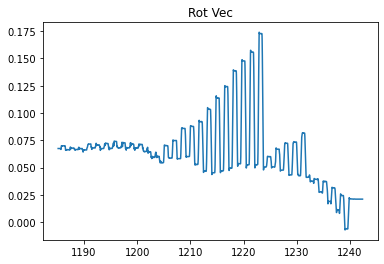

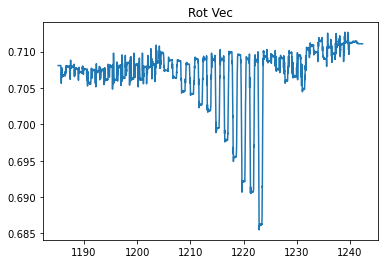

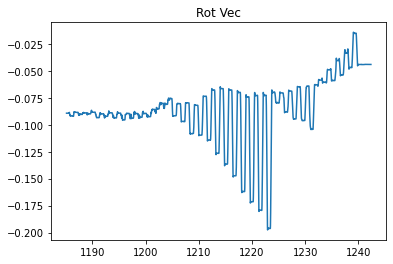

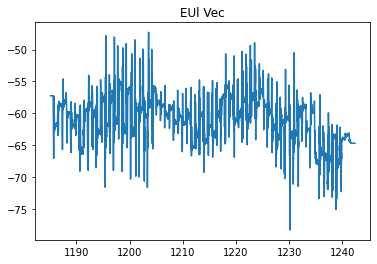

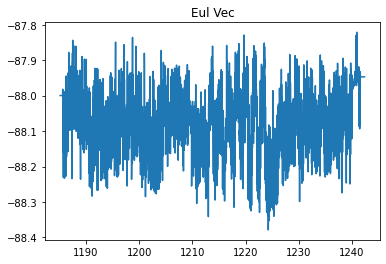

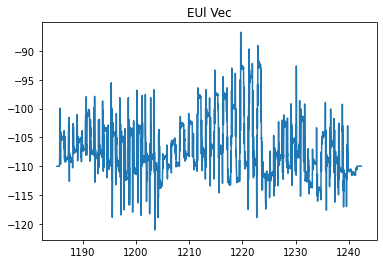

In [6]:


fig, ax = plt.subplots()
plt.title("Acceleration")
ax.plot( accel_vec_ts,accel_vecs,'*')
plt.show()
fig, ax = plt.subplots()
plt.title("Gyroscope x")
ax.plot( accel_vec_ts,gyro_vecs[:,0])
plt.show()
fig, ax = plt.subplots()
plt.title("Gyroscope y")
ax.plot( accel_vec_ts,gyro_vecs[:,1])
plt.show()
fig, ax = plt.subplots()
plt.title("Gyroscope z")
ax.plot( accel_vec_ts,gyro_vecs[:,2])
plt.show()

fig, ax = plt.subplots()
plt.title("Rot Vec")
ax.plot( rot_vec_ts,rot_vecs[:,0])
plt.show()
fig, ax = plt.subplots()
plt.title("Rot Vec")
ax.plot( rot_vec_ts,rot_vecs[:,1])
plt.show()
fig, ax = plt.subplots()
plt.title("Rot Vec")
ax.plot( rot_vec_ts,rot_vecs[:,2])
plt.show()
fig, ax = plt.subplots()
plt.title("Rot Vec")
ax.plot( rot_vec_ts,rot_vecs[:,3])
plt.show()
fig, ax = plt.subplots()
plt.title("EUl Vec")
ax.plot( rot_vec_ts,eul_vecs[:,0])
plt.show()
fig, ax = plt.subplots()
plt.title("Eul Vec")
ax.plot( rot_vec_ts,eul_vecs[:,1])
plt.show()
fig, ax = plt.subplots()
plt.title("EUl Vec")
ax.plot( rot_vec_ts,eul_vecs[:,2])
plt.show()


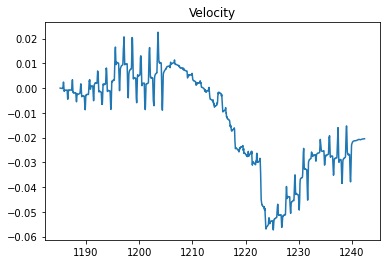

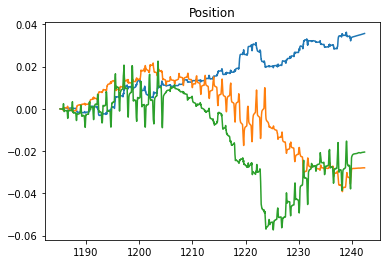

In [7]:
#try acceleration integrator
v=np.zeros(3)
x=np.zeros(3)
xs=[]
vs=[]
ts=[]
t=accel_vec_ts[0]
drag=0.2
for i in range(len(accel_vecs)):
    dt=accel_vec_ts[i]-t
    x=x+0.5*v*dt
    v=v+np.array(accel_vecs[i])*dt-v*drag
    x=x+0.5*v*dt
    t=accel_vec_ts[i]
    xs.append(x)
    vs.append(x)
    ts.append(accel_vec_ts[i])
vs=np.array(vs)
fig, ax = plt.subplots()
plt.title("Velocity")
plt.plot(ts,vs[:,2])
plt.show()
plt.title("Position")
plt.plot(ts,xs)
plt.show()
    

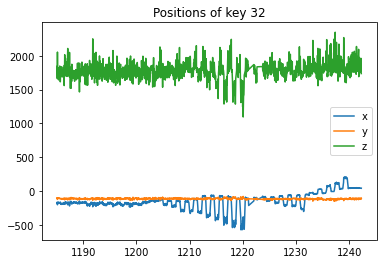

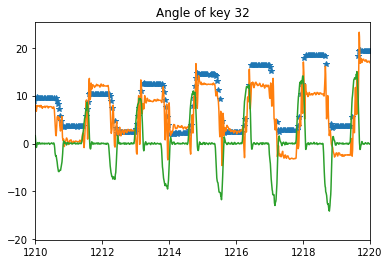

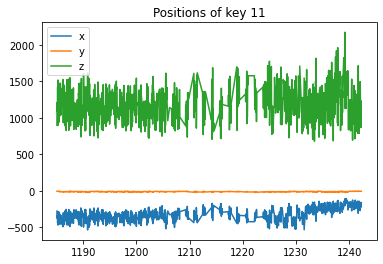

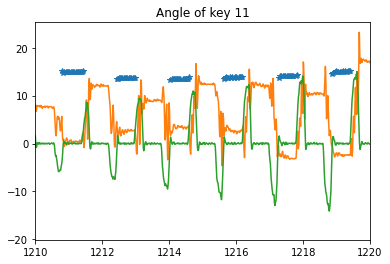

In [12]:
from matplotlib import pyplot as plt

def get_unique_tagged_objects(tagged_objects,objects_to_watch):
        ret={}
        label_list=[ x["label"] for x in tagged_objects]
        for key in objects_to_watch:
            if label_list.count(key)>1 or label_list.count(key)==0:
                continue
            elem=next(filter(lambda x: x["label"]==key,tagged_objects))
            ret[key]=elem
        return ret

positions={}
timestamps={}
for message in sensor_log:
    if "detections" in message:
        dets=get_unique_tagged_objects(message["detections"],[32,11])
        for key in dets:
            if key not in positions:
                positions[key]=[]
                timestamps[key]=[]
            positions[key].append(dets[key]["spatial_array"])
            #timestamps[key].append(message["timestamp"]-first_timestamp)
            timestamps[key].append(message["image_timestamp"])
for key in positions:
    positions[key]=np.array(positions[key])
    
for key in positions:
    fig, ax = plt.subplots()
    plt.title("Positions of key {}".format(key))
    #plt.ylim([0,0.5])
    labels=["x","y","z"]
    for i in range(3):
        ax.plot( timestamps[key],positions[key][:,i],label=labels[i])
    plt.legend()
    plt.show()
    fig, ax = plt.subplots()
    plt.title("Angle of key {}".format(key))
    #plt.ylim([0,0.5])
    plt.xlim(1210,1220)
    ax.plot( timestamps[key],-(360/(2*np.pi))*np.arctan2(positions[key][:,0],positions[key][:,2]) ,'*'           )
    ax.plot( rot_vec_ts,eul_vecs[:,2]-eul_vecs[0,2])
    ax.plot( gyro_vec_ts,10*gyro_vecs[:,0])

    plt.show()

In [9]:
tstart=None
delta_t_imu=[]
delta_t_image=[]
for message in sensor_log:    
    if "detections" in message:
        t=message["image_timestamp"]
        if tstart==None:
            tstart=t
        t=t-tstart
        delta_t_image.append(t-message["timestamp"])
        print("{} image".format(t))
    if 'packets' in message:
        t1=message["packets"][0]["gyroscope_timestamp"]
        t2=message["packets"][-1]["gyroscope_timestamp"]        
        if tstart==None:
            tstart=t1
        t1=t1-tstart
        t2=t2-tstart
        delta_t_imu.append(t2-message["timestamp"])
        print("{} - {} has {} packets".format(t1,t2,len(message["packets"])))

0.0 - 0.0332220000000234 has 5 packets
-0.06456399999979112 image
-0.031235999999807973 image
0.050664000000097076 - 0.1006520000000819 has 5 packets
0.0020930000000589644 image
0.11604700000020785 - 0.16577600000005077 has 5 packets
0.035423000000037064 image
0.17818300000021736 - 0.217928000000029 has 5 packets
0.06875000000013642 image
0.10208000000011452 image
0.23323800000002848 - 0.2838640000002215 has 5 packets
0.13540800000009767 image
0.29822900000021946 - 0.33829000000014275 has 5 packets
0.16873700000019198 image
0.20206500000017513 image
0.23539400000004207 image
0.35020200000008117 - 0.39585100000022067 has 5 packets
0.30205100000011953 image
0.3353790000001027 image
0.4082380000002104 - 0.462992000000213 has 5 packets
0.3687070000000858 image
0.47839300000009644 - 0.5283710000001065 has 5 packets
0.4020370000000639 image
0.435367000000042 image
0.5408400000001166 - 0.5758590000000368 has 5 packets
0.4686940000001414 image
0.5859460000001491 - 0.6342759999999998 has 5 pack

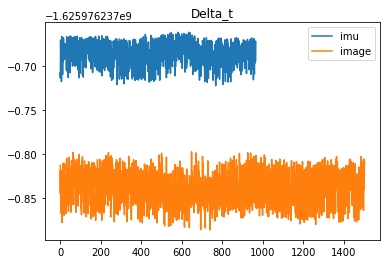

In [10]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
plt.title("Delta_t")
ax.plot( delta_t_imu,label="imu")
ax.plot(delta_t_image,label="image")
plt.legend()
plt.show()